In [11]:
import numpy as np

# Option parameters
rf  = 0.025 # Annual risk-free rate
vol = 0.35    # Annual volatility of stock
S0  = 123 # Stock price at time 0
K   = 124    # Strike price 4.75
T   = 36/365   # Time to expiration of option (in years)


# Simulation parameters
n = 36     # Number of subperiods (one trading day)
N = 100000 # Number of simulations

# Intermediate calculations
dt  = T/n  # Length of time step
rfT = rf*T # Risk-free rate over the life of option

u  = np.exp(vol*np.sqrt(dt)) # Up growth rate
d  = 1/u                     # Down growth rate

Pu = (np.exp(rf*dt)-d)/(u-d) # Probability of going up
Pd = 1-Pu                    # Probability of going down

In [12]:
def SimulatePath(d,u,Pd,S0,K,rf,T):
    S = np.zeros(T+1)
    for i in range(T+1):
        if i == 0:
            S[i] = S0
        else:
            if np.random.rand() < Pd:
                S[i] = S[i-1]*d
            else:
                S[i] = S[i-1]*u
    CT = max(S[T]-K,0) # European Call Option
    return [CT, S]

In [4]:
[CT, S] = SimulatePath(.80,1.10,.45,50,44,.025,3)
print(S)

[50.   55.   60.5  66.55]


In [5]:
def MonteCarlo(d,u,Pd,S0,K,rf,n,N):
    CT = np.zeros(N)
    S = np.zeros((n + 1, N))
    for i in range(N):
        [CT[i],S[:,i]] = SimulatePath(d,u,Pd,S0,K,rf,n)
    ECT = np.average(CT)
    C0 = ECT/np.exp(n*rf)
    # return C0
    return (C0, CT, S)

In [47]:
[C0, CT, S] = MonteCarlo(0.99,1.01,.49,660,604,.0011,1000,100000)
print(S)

[[ 660.          660.          660.         ...  660.
   660.          660.        ]
 [ 666.6         653.4         666.6        ...  666.6
   653.4         666.6       ]
 [ 673.266       659.934       673.266      ...  673.266
   646.866       659.934     ]
 ...
 [ 814.31397234 1056.11744425  545.84370103 ...  936.68839789
   707.92725419  680.16812257]
 [ 822.45711207 1066.67861869  540.38526402 ...  927.32151391
   700.84798165  686.96980379]
 [ 814.23254094 1077.34540488  545.78911666 ...  918.04829877
   693.83950183  680.10010575]]


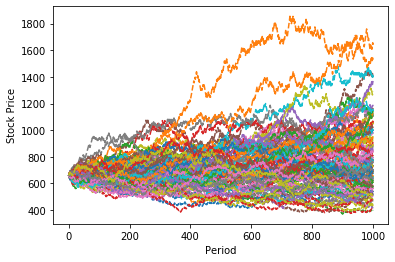

In [48]:
import matplotlib.pyplot as plt
# The matplotlib package contains plotting functions.
plt.plot(S[:,1:100],'--') # Plot the first 100 simulations.
plt.ylabel('Stock Price')
plt.xlabel('Period')
plt.show()

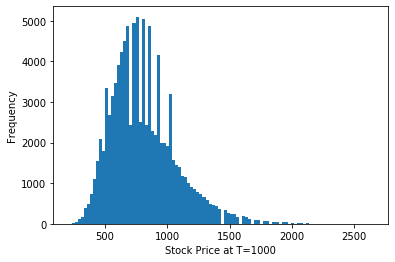

In [53]:
plt.hist(S[1000,:],100)
# Plot histogram of final stock price for all simulations. Use 100 bins.
plt.ylabel('Frequency')
plt.xlabel('Stock Price at T=1000')
plt.show()